In [280]:
import warnings
warnings.filterwarnings('ignore')


# Importing necessary libraries and functions :
import pandas as pd
import numpy as np
from math import sqrt
import time
import kagglehub



#import gensim 
import re # Regular Expression library
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize # Tokenizaion 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Plotting libraries :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn :
import sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve, auc

In [281]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("/Users/gia/Downloads/training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
664943,0,2244696334,Fri Jun 19 15:05:30 PDT 2009,NO_QUERY,madwisdom,"@KatieSandiego aw, i didnt want to contribute ..."
162219,0,1957497094,Fri May 29 00:41:10 PDT 2009,NO_QUERY,Leemcathy,im ill hate it. seeing the doc at 5 too 10.
59950,0,1686269263,Sun May 03 04:38:28 PDT 2009,NO_QUERY,DrStringfellow,Not me but a good friend. Sucks man.
568638,0,2207620423,Wed Jun 17 08:10:12 PDT 2009,NO_QUERY,takemeback,"also, fml, i forgot to do @travelchannel trivi..."
699415,0,2254440309,Sat Jun 20 09:45:08 PDT 2009,NO_QUERY,shwetal,donno how thye make them so big in Hyd... the ...


In [282]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [283]:
# Display the number of records is our dataset :
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1048576 tweets


In [284]:
# The shape of our data :
print("The shape of our dataset is {}".format(df. shape))

The shape of our dataset is (1048576, 6)


In [285]:
# Getting info about our dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [286]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


In [287]:
# Checking for Null values :
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


In [288]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1048576


In [289]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4])

In [290]:
df['target'].nunique()

2

In [291]:
# Let's explore our target variable 'target'
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


In [292]:
# Replacing the values to ease understanding :
df['target'] = df['target'].replace(4,1)

In [293]:
# Let's explore the ids feature:
print("The number of unique values of the ids feature is {}".format(df['ids'].nunique()))

The number of unique values of the ids feature is 1048045


In [294]:
# Exploring our date feature :
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 662454


In [295]:
# Exploring the flag feature :
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


In [296]:
# Explore the user feature :
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 511365


In [297]:
# Reviewing duplicates in tweet feature :
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1036136


In [298]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
1,248576,248576,248576,248576,248576


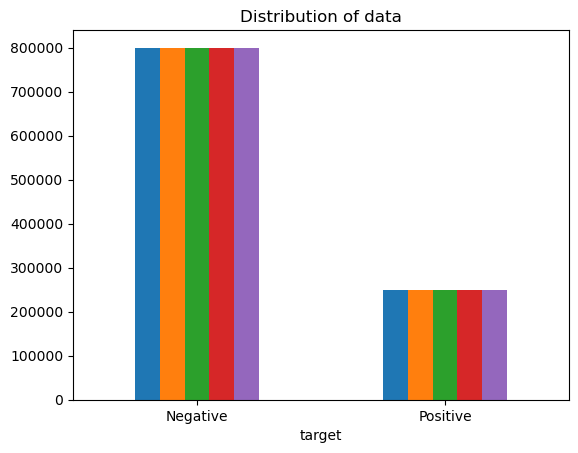

In [299]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])


<Axes: xlabel='target', ylabel='count'>

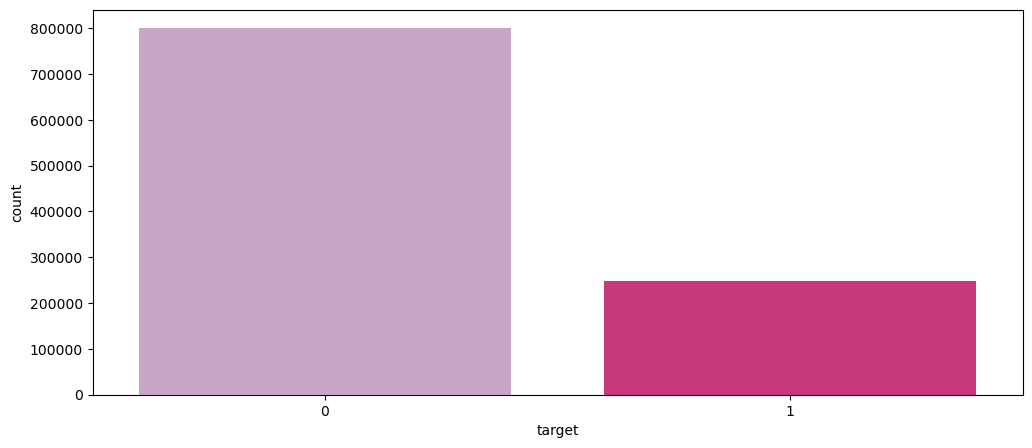

In [300]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

In [301]:
# Lowering Case :
print("=========== Before Lowering case ============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Lowering case ===========\n")
df['text'] = df['text'].str.lower()
print("\t" + df.loc[10, "text"])

=========== Before Lowering case ============

	spring break in plain city... it's snowing 

=========== After Lowering case ===========

	spring break in plain city... it's snowing 


In [302]:
# Removal of Mentions:

## Creating a fucntion that will be applied to our datset :
def RemoveMentions(text):
    text_ = re.sub(r"@\S+", "", text)
    return text_


## Applying the function to each row of the data
print("=========== Before Removing Mentions ============\n")
print("\t" + df.loc[5, "text"])
print("\n=========== After Removing Mentions ===========\n")
df["text"] = df["text"].apply(RemoveMentions)
print("\t" + df.loc[5, "text"])

=========== Before Removing Mentions ============

	@kwesidei not the whole crew 

=========== After Removing Mentions ===========

	 not the whole crew 


In [303]:
# Defining a list containing punctuation signs of english :
punctuations_list = string.punctuation


## Defining that will be applied to our datset : 
def RemovePunctuations(text):
    transformator = str.maketrans('', '', punctuations_list)
    return text.translate(transformator)


## Applying the fucntion to all rows :
print("=========== Before Removing Punctuations =============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Removing Punctuations \===========\n")
df["text"] = df["text"].apply(RemovePunctuations)
print("\t" + df.loc[10, "text"])

=========== Before Removing Punctuations =============

	spring break in plain city... it's snowing 

=========== After Removing Punctuations \===========

	spring break in plain city its snowing 


In [304]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [305]:
# Getting the pre defined stop words from nltk library :
import nltk
nltk.download('stopwords')

stopwords = stopwords.words('english')

## Copying the df to use other libraries (spacy and gensim)
df_copy1 = df.loc[:100].copy(deep=True)
df_copy2 = df.copy(deep=True)  # deep copy to create another df 

## Applying the fucntion to all rows
print("=========== Before Removing Stop words ============\n")
print("\t" + df_copy2.loc[12, "text"])
print("\n=========== After Removing Stop words ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy2['text'] = df_copy2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print("\t" + df_copy2.loc[12, "text"])

[nltk_data] Downloading package stopwords to /Users/gia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=========== Before Removing Stop words ============

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words ===========

	couldnt bear watch thought ua loss embarrassing


In [306]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [307]:
## Creating a fucntion that will be applied to our datset :
def RemoveStopsSpacy(text):
    # Load English tokenizer, tagger, parser, NER and word vectors
    nlp = English()

    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    # Create list of word tokens after removing stopwords
    filtered_sentence = []

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return filtered_sentence


## Applying the fucntion to all rows
print("=========== Before Removing Stop words with spaCy ===========\n")
print("\t" + df_copy1.loc[12, "text"])
print("\n=========== After Removing Stop words with spaCy ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy1['text'] = df_copy1['text'].apply(lambda x: ' '.join(RemoveStopsSpacy(x)))
print("\t" + df_copy1.loc[12, "text"])

=========== Before Removing Stop words with spaCy ===========

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with spaCy ===========

	  nt bear watch   thought ua loss embarrassing     


In [308]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [309]:
## Applying the fucntion to all rows
#!pip3 install --upgrade numpy scipy Cython

import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords

# Assuming df is your DataFrame and has a 'text' column
print("\t" + df.loc[12, "text"])
print("\n=========== After Removing Stop words with Gensim =======\n")

# Remove stop words from the 'text' column
df['text'] = df['text'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)

print("\t" + df.loc[12, "text"])


	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with Gensim =======

	bear watch thought ua loss embarrassing


In [310]:
## Creating a fucntion that will be applied to our datset :
def RemoveLinks(text):
    return re.sub(r"http\S+", "", text)


## Applying the fucntion to all rows of our dataset :
print("=========== Before Removing Hyperlinks =======\n")
print("\t" + df.loc[0, "text"])  # let's see for example the first row, which contains an hyperlink.
print("\n=========== After Removing Hyperlinks =======\n")
df['text'] = df['text'].apply(RemoveLinks)
print("\t" + df.loc[0, "text"])

=========== Before Removing Hyperlinks =======

	httptwitpiccom2y1zl awww thats bummer shoulda got david carr day d

=========== After Removing Hyperlinks =======

	 awww thats bummer shoulda got david carr day d


In [311]:
## Creating a fucntion that will be applied to our datset :
def RemoveNumbers(text):       
    return re.sub(r"[0-9]+", "", text)

## Applying the fucntion to all rows
print("=========== Before Removing Numbers =======\n")
print("\t" + df.loc[2,"text"])  #let's see for example the thirs row, which contains an number 50
print("\n=========== After Removing Numbers ========\n")
df['text'] = df['text'].apply(RemoveNumbers)
print("\t" + df.loc[2,"text"])

=========== Before Removing Numbers =======

	dived times ball managed save 50 rest bounds

=========== After Removing Numbers ========

	dived times ball managed save  rest bounds


In [312]:
## Creating a fucntion that will be applied to our datset :
def RemoveWhitespaces(text):
    text=text.strip()  # Leading and trailing whitespaces are removed
    return re.sub(r" +"," ",text)

## Applying the fucntion to all rows :
df['text'] = df['text'].apply(lambda x: RemoveWhitespaces(x))

In [313]:
# And now, let's see our tweet content feature:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 965264
The total number of rows in our dataframe is : 1048576
The number of duplicated rows in our dataframe is : 83312


In [314]:
# Removing duplicate row records but keeping original text : ( we only keep the first duplicate )
df = df.drop_duplicates(subset='text', keep='first')

In [315]:
# Checking if duplicates have been removed:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 965264
The total number of rows in our dataframe is : 965264
The number of duplicated rows in our dataframe is : 0


In [316]:
# Viewing the initial dataframe columns :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [317]:
#df = pd.read_csv("/Users/gia/Downloads/training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

df=df.drop(['ids', 'date', 'flag', 'user'], axis = 1)

In [318]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

if df.shape[0] > 1000:
    df = df.sample(n=1000, random_state=1)  # Sample 1000 rows if needed

# Step 2: Initialize CountVectorizer with a limit on features
vectorizer = CountVectorizer(max_features=1000)
#vectorizer = CountVectorizer()

# Step 3: Fit and transform the text data to get tokenized output
# Assuming the column with text is named 'text'
X = vectorizer.fit_transform(df['text'])

# Step 4: Get the tokens
tokens = vectorizer.get_feature_names_out()

# Step 5: Convert the result to a DataFrame for better visualization (optional)
tokenized_tweets = pd.DataFrame(X.toarray(), columns=tokens)

# Show the original DataFrame and the tokenized DataFrame
print(df.head())



        target                                               text
833080       1  thanks keeping couple projects burner need rig...
862757       1             hi im sorry following said wont happen
773250       0  fan patti balgojevich crying money id donate c...
812294       1  sooo watched disaster movie absolutly hilariou...
178939       0  feeeel like ima die way rainforest need girls ...


In [319]:
# Creating an instance of the stemmer :

from nltk.stem import PorterStemmer
import pandas as pd

# Initialize the stemmer
stemmer = PorterStemmer()

# Define the stemming function, handling NaN or missing values
def Stemmer(text):
    if isinstance(text, str):
        return " ".join([stemmer.stem(word) for word in text.split()])
    else:
        return ""

# Convert the tokenized matrix back into a column of text (with space-separated tokens)
df['tokenized_tweets'] = tokenized_tweets.apply(lambda row: ' '.join(row.index[row > 0]), axis=1)

# Fill NaN values with empty strings before applying the stemmer
df['tokenized_tweets'] = df['tokenized_tweets'].fillna('')

# Apply the stemmer function to the tokenized tweets
df['tokenized_tweets_stemmed'] = df['tokenized_tweets'].apply(Stemmer)

# Display the resulting DataFrame
print(df[['tokenized_tweets', 'tokenized_tweets_stemmed']].head())


       tokenized_tweets tokenized_tweets_stemmed
833080                                          
862757                                          
773250                                          
812294                                          
178939                                          


In [320]:
# Checking the results :
df.head(10)

,target,text,tokenized_tweets,tokenized_tweets_stemmed
833080,1,thanks keeping couple projects burner need rig...,,
862757,1,hi im sorry following said wont happen,,
773250,0,fan patti balgojevich crying money id donate c...,,
812294,1,sooo watched disaster movie absolutly hilariou...,,
178939,0,feeeel like ima die way rainforest need girls ...,,
613343,0,ppl tell steven save money live uggh increased...,,
292742,0,aw thats fun thanks letting know,,
897737,1,lets whats demand catch guys later amp good lu...,,
139742,0,agree sigh,,
101688,0,oh man sucks work place counsels divorcing par...,,


In [321]:
# Creating an instance of the limmatizer :
wordnet_lemmatizer = WordNetLemmatizer()

# Applying the limmatizer to all rows:
df['tokenized_tweets_stemmed_lemmatized'] = df['tokenized_tweets_stemmed'].apply(
    lambda text: wordnet_lemmatizer.lemmatize(text, pos="v"))

In [322]:
df.head(50)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
833080,1,thanks keeping couple projects burner need rig...,,,
862757,1,hi im sorry following said wont happen,,,
773250,0,fan patti balgojevich crying money id donate c...,,,
812294,1,sooo watched disaster movie absolutly hilariou...,,,
178939,0,feeeel like ima die way rainforest need girls ...,,,
613343,0,ppl tell steven save money live uggh increased...,,,
292742,0,aw thats fun thanks letting know,,,
897737,1,lets whats demand catch guys later amp good lu...,,,
139742,0,agree sigh,,,
101688,0,oh man sucks work place counsels divorcing par...,,,


In [323]:
# Saving our dataframe :
df.to_csv("cleaned.csv")

In [324]:
df.head(2)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
833080,1,thanks keeping couple projects burner need rig...,,,
862757,1,hi im sorry following said wont happen,,,


In [325]:
# Let's create a function which creates a wordcloud of a given pandas Series object :
def wordCloud(data_pos, max_words):
    # call the wordcloud function to show the most top 1000 used words:
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)

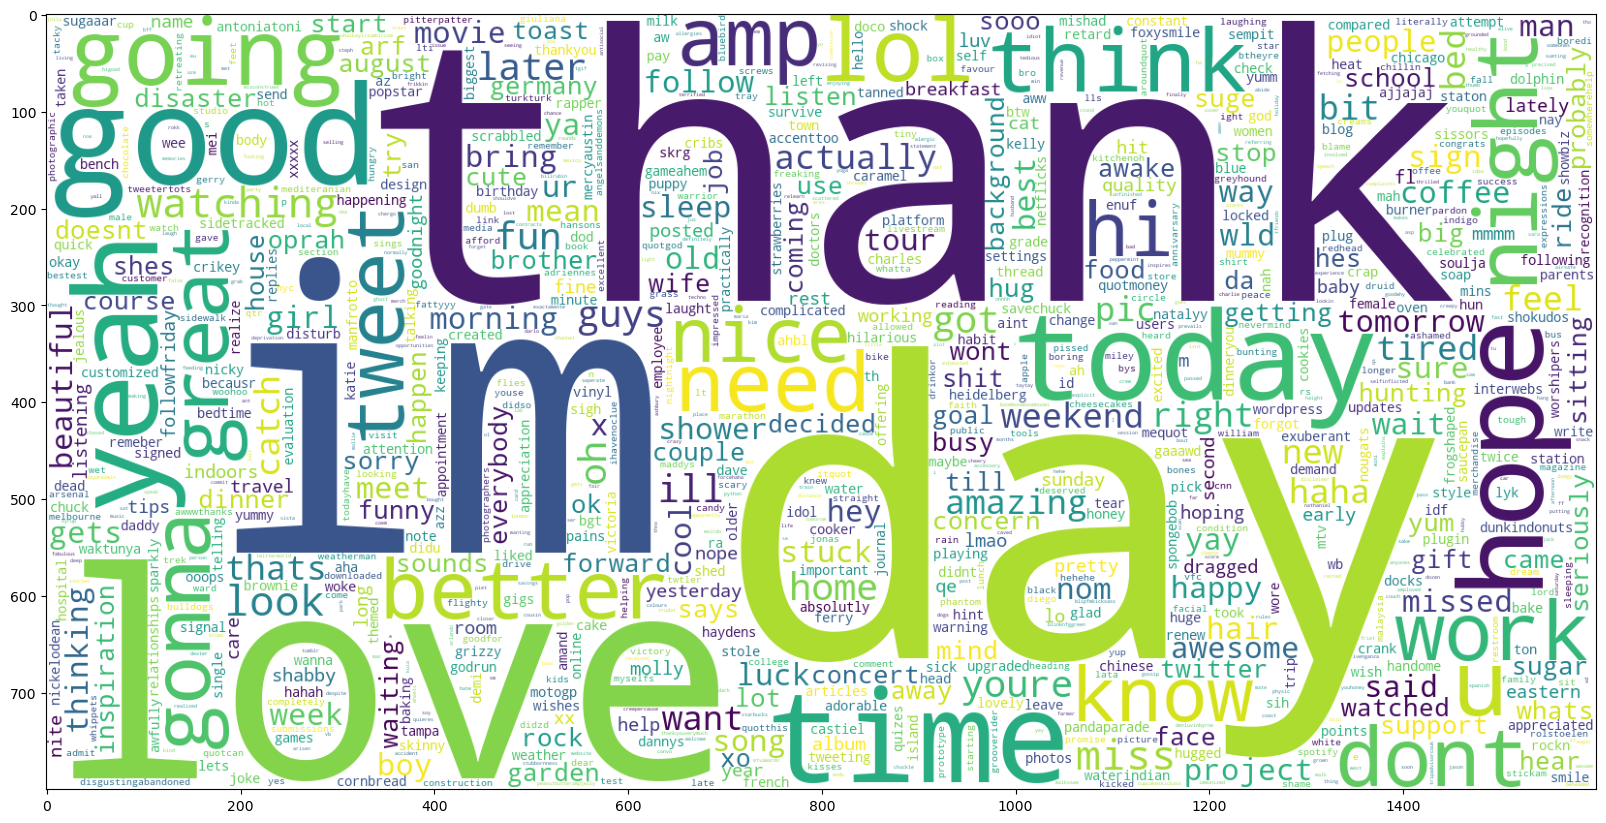

In [326]:
wordCloud(df.loc[df["target"] == 1, "text"],2000)

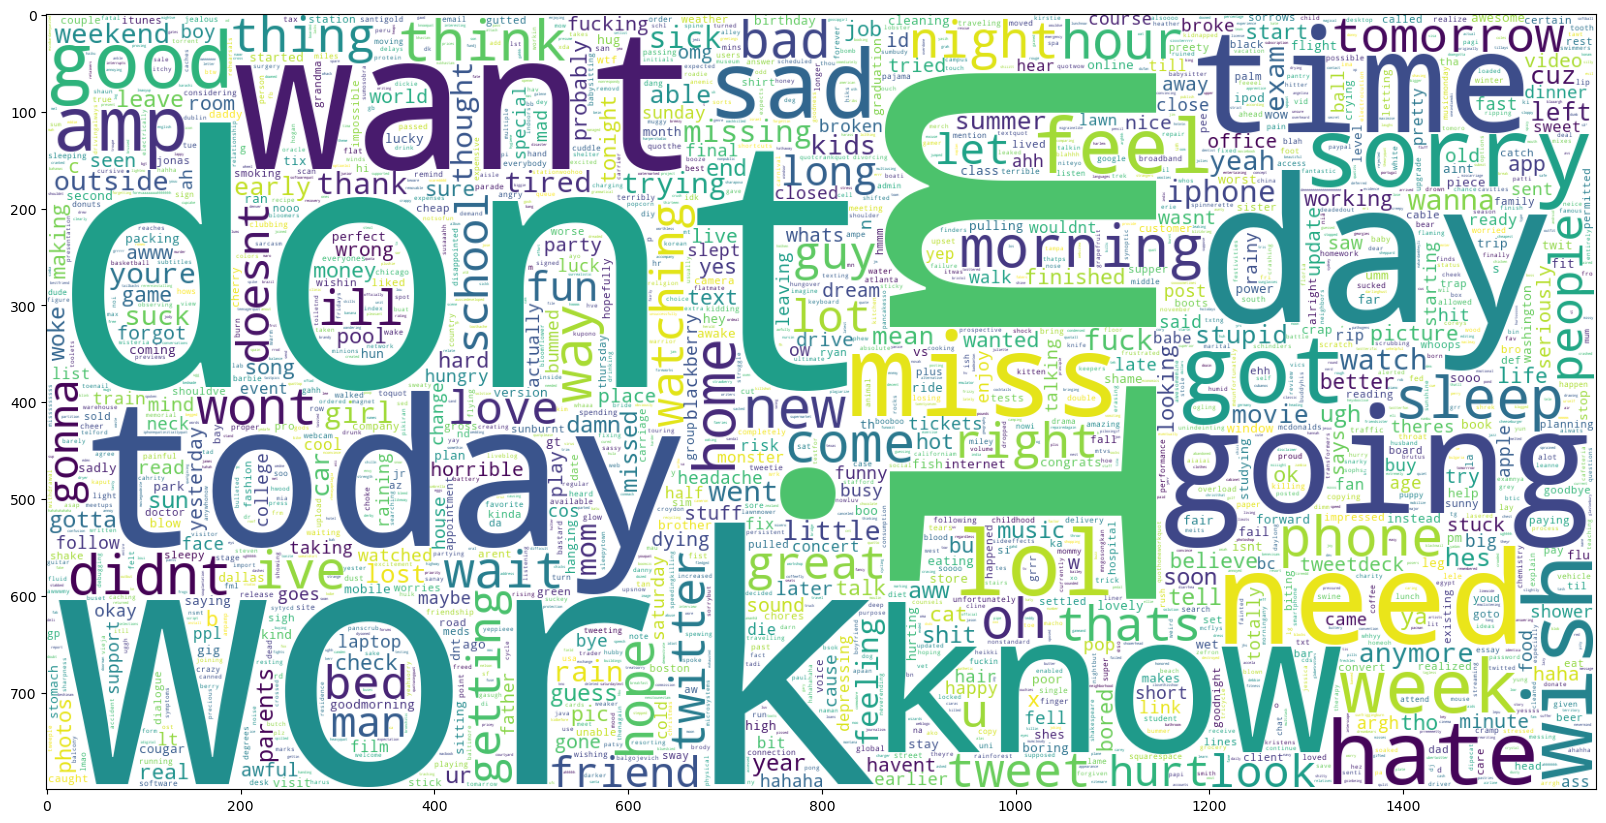

In [327]:
wordCloud(df.loc[df["target"] == 0, "text"], 2000)

In [328]:
# Calculating tweet’s lenght :
df["text_length"] = df["text"].apply(len)


# let's show the mean word count of each sentiment :
round(pd.DataFrame(df.groupby("target").text_length.mean()),2)

,text_length
target,
0,42.56
1,40.64


In [329]:
# Generating one row :
df_reduced = df.sample(frac =.10)
  
# Displaying the reduced dataset :
df_reduced

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized,text_length
305238,0,blogged im proud,,,,16
49489,0,hahahahahaha yes yes yes yes ok umm im sorry m...,,,,80
590314,0,y seeing ur tweets earlier,,,,26
564004,0,check story tweetdeck iphone vs tweetie u appe...,,,,90
854027,1,amand im telling demi huge inspiration mei hop...,,,,67
...,...,...,...,...,...,...
894003,1,eu ï¿½tima,,,,10
313167,0,case thats funny anymore,,,,24
225447,0,half broke foot yesterday carnival,,,,34
269869,0,got hours sleep s need whats wrong able sleep,,,,45


In [330]:
print( "The shape of the original dataset: " + str(df.shape))
print( "The shape of the reduced dataset: " + str(df_reduced.shape))

The shape of the original dataset: (1000, 6)
The shape of the reduced dataset: (100, 6)


In [331]:
# Separating input feature and label :
X = df["tokenized_tweets_stemmed_lemmatized"]
y = df["target"]

X_reduced = df_reduced["tokenized_tweets_stemmed_lemmatized"]
y_reduced = df_reduced["target"]

In [332]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced,
                                                                                    test_size=0.15, random_state=100)

In [333]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

		 The training execution time of this model is 0.01 seconds 

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		⚠️The test execution time of this model is 0.04 seconds 



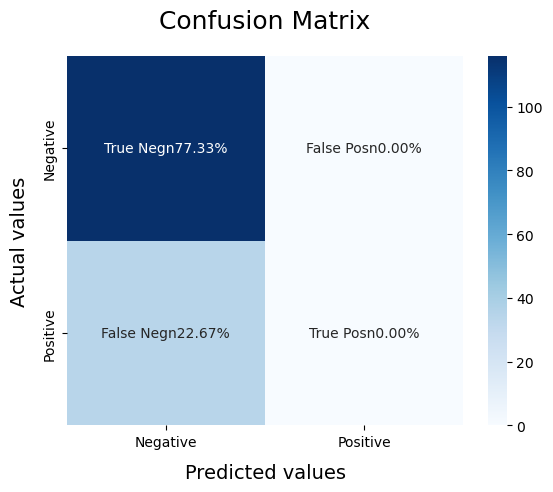

In [334]:
""" # Model-1 : Bernoulli Naive Bayes.
 """
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
import time

# Example: Ensure all columns in X_train and X_test are numeric

# Convert non-numeric columns to numeric if needed (e.g., using one-hot encoding)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in train and test to avoid missing columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fill any empty or NaN values with 0 (or any other value appropriate for your data)
X_train.replace('', np.nan, inplace=True)
X_train.fillna(0, inplace=True)

X_test.replace('', np.nan, inplace=True)
X_test.fillna(0, inplace=True)

# Model training and timing
BNBmodel = BernoulliNB()
start1 = time.time()
BNBmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t The training execution time of this model is {:.2f} seconds \n".format(end1 - start1))

# Model evaluation and timing
start2 = time.time()
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
end2 = time.time()
print("\t\t⚠️The test execution time of this model is {:.2f} seconds \n".format(end2 - start2))




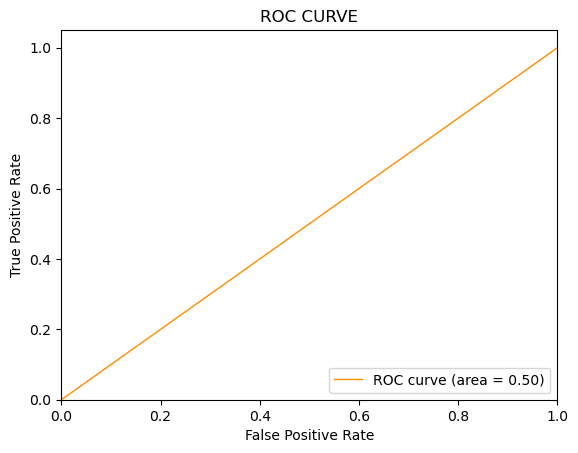

In [335]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		⚠️⚠️⚠️ The training execution time of this model is 0.01 seconds ⚠️⚠️⚠️

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		⚠️⚠️⚠️ The test execution time of this model is 0.03 seconds ⚠️⚠️⚠️



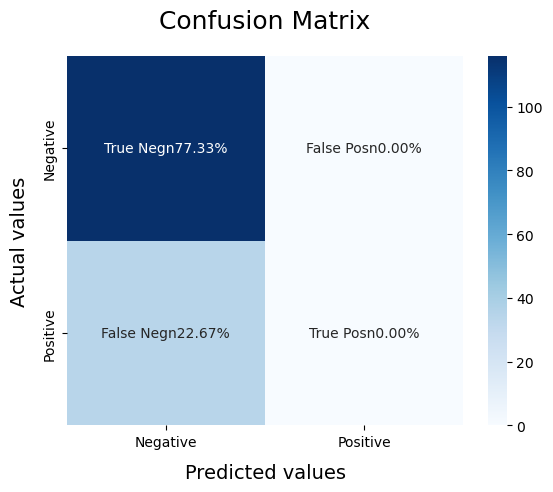

In [336]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start1 = time.time()
SVCmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t⚠️⚠️⚠️ The training execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end1-start1))
start2 = time.time()
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
end2 = time.time()
print("\t\t⚠️⚠️⚠️ The test execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end2-start2))

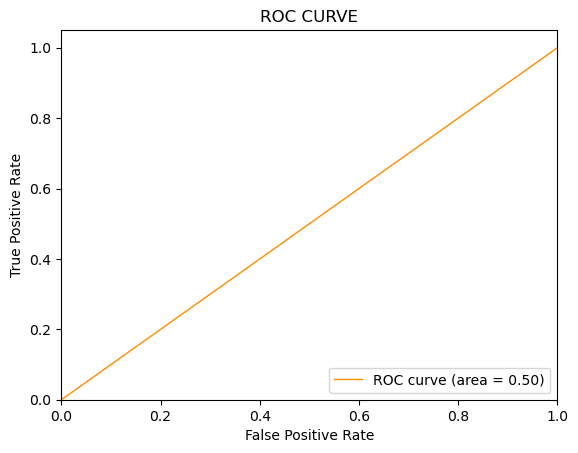

In [337]:
# Plot the ROC-AUC Curve for model-2 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		⚠️⚠️⚠️ The training execution time of this model is 1.19 seconds ⚠️⚠️⚠️

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		⚠️⚠️⚠️ The test execution time of this model is 0.02 seconds ⚠️⚠️⚠️



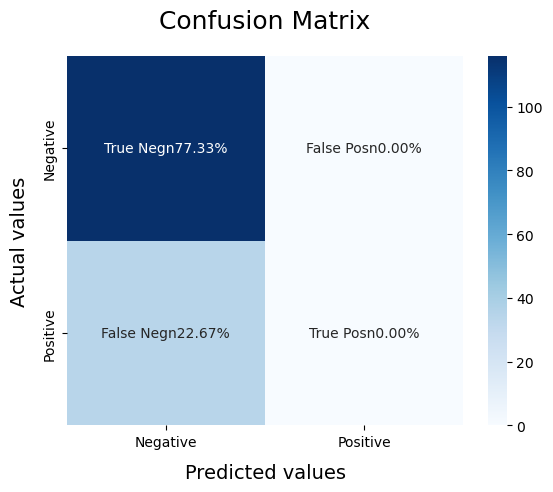

In [338]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start1 = time.time()
LRmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t⚠️⚠️⚠️ The training execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end1-start1))
start2 = time.time()
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
end2 = time.time()
print("\t\t⚠️⚠️⚠️ The test execution time of this model is {:.2f} seconds ⚠️⚠️⚠️\n".format(end2-start2))

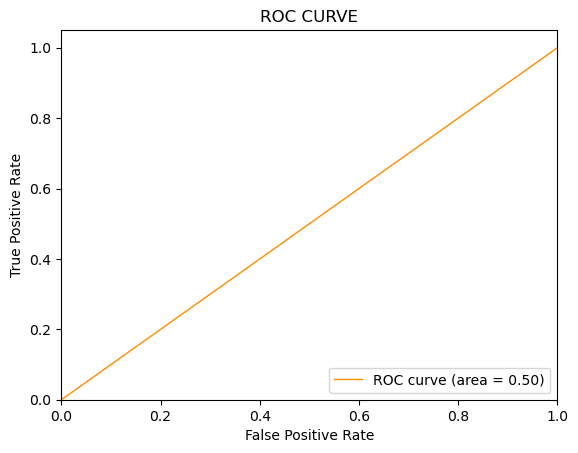

In [339]:
# Plot the ROC-AUC Curve for model-3 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

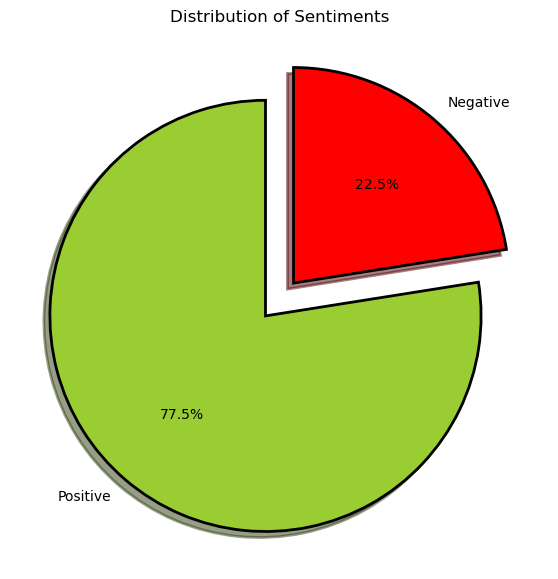

In [340]:
import matplotlib.pyplot as plt

# Mapping the target column to sentiment labels
sentiment_counts = df['target'].map({1: 'Positive', 0: 'Negative'}).value_counts()

# Adjust colors and explode to match the number of unique sentiments
colors = ["yellowgreen", "red"]  # Positive = yellowgreen, Negative = red
explode = [0.1, 0.1]  # Explode both slices slightly

# Plotting the pie chart
fig = plt.figure(figsize=(7, 7))
wp = {'linewidth': 2, 'edgecolor': "black"}

sentiment_counts.plot(
    kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
    startangle=90, wedgeprops=wp, explode=explode, labels=['Positive', 'Negative']
)

plt.title('Distribution of Sentiments')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()
